# Analysis dataset toy

In [88]:
import numpy as np
import pickle as pkl
from multiprocessing import Pool
from p_tqdm import p_map
from matplotlib import pyplot as plt
from collections import Counter
import glob

# Data init

In [89]:
path = ('/data/vision/torralba/frames/data_acquisition/SyntheticStories/online_wah/'
        'agent_preferences/dataset/structured_agent/train_env_task_set_150_full_task.all.pik')


In [90]:
def get_task_type_env(episode_content):
    if type(episode_content) == str:
        with open(episode_content, 'rb') as f:
            episode_content = pkl.load(f)
    goals = episode_content['task_goal'][0]
    num_preds = sum(goals.values())
    name_preds = [goal_name.split('_')[1] for goal_name in goals.keys()]
    return {'pred_name': episode_content['task_name'], 'num_preds': num_preds}
    

In [117]:
def get_task_info_env(episode_content):
#     print(episode_content)
    
    # Check distribution of objects
    first_graph = episode_content['init_graph']
    objects_interest = ['cupcake', 'salmon', 'apple', 'plate', 'waterglass', 'cutleryfork', 'chips', 'remotecontrol']
    obj2id = {name:index for index, name in enumerate(objects_interest)}
    
    object_relation_count = {}
    count_obj = [0 for _ in objects_interest]
    for object_name in objects_interest: 
        object_relation_count[object_name] = []
        
    id2node = {node['id']: node for node in first_graph['nodes']}
    
    # For every destination object, check the different locations
    for edge in first_graph['edges']:
        class_name = id2node[edge['from_id']]['class_name']
        if class_name in objects_interest:
            class_name_dest = id2node[edge['to_id']]['class_name']
            relation = edge['relation_type'].lower()
            if relation in ['close', 'facing']:
                continue
            full_relation_name = f'{relation}.{class_name_dest}'
            object_relation_count[class_name].append(full_relation_name)
    
    for node in first_graph['nodes']:
        class_name = node['class_name']
        if class_name in objects_interest:
            class_name_id = obj2id[class_name]
            count_obj[class_name_id] += 1
            
    # Counter over relations
    for class_name in objects_interest:
        object_relation_count[class_name] = Counter(object_relation_count[class_name])
    
    info = get_task_type_env(episode_content)
    info.update({'count_obj': count_obj})
    info.update({'obj_relations': object_relation_count})
    return info
    

In [118]:
with open(path, 'rb') as f:
    cont = pkl.load(f)
results = [get_task_info_env(ep) for ep in cont]

In [119]:
results = [get_task_info_env(ep) for ep in cont]

In [120]:
all_counts.shape

(200, 6)

In [121]:

name_dict = {name: it for it, name in enumerate(names)}


(750, 8)
(750, 8)
(200, 8)


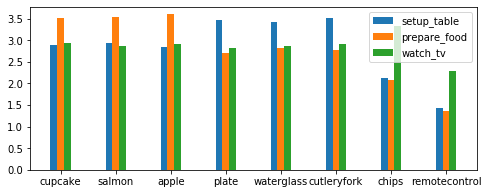

In [122]:


names = ["setup_table","prepare_food", "watch_tv"]
objects_interest = ['cupcake', 'salmon', 'apple', 'plate', 'waterglass', 'cutleryfork', 'chips', 'remotecontrol']
# Get object counts
obj_counts = [[] for _ in names]
for result in results:
    task_name = result['pred_name']
    task_id = name_dict[task_name]
    obj_counts[task_id].append(np.array(result['count_obj'])[None, ])
all_count_max, all_count_mean = [None for _ in names], [None for _ in names]
for it in range(len(names)):
    all_counts = np.concatenate(obj_counts[it])
    print(all_counts.shape)
    all_count_mean[it] = np.mean(all_counts, axis=0)
    all_count_max[it] = np.max(all_counts, axis=0)

fig, ax2 = plt.subplots(1,1, figsize=(8,3))
x = np.array(range(len(objects_interest)))
for idi in range(len(names)):
    gap = idi + 0.5 - len(names)/2
    gap *= 1./(len(objects_interest))
    gp = 1./(len(objects_interest))
    ax2.bar(x+gap, list(all_count_mean[idi]), width=gp, label=names[idi])
    ax2.set_xticks(x)
    ax2.set_xticklabels(objects_interest)
    plt.legend()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

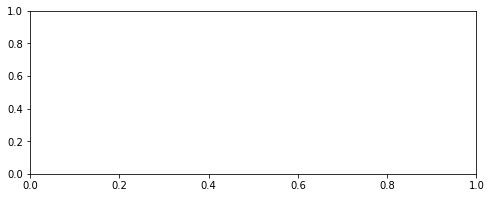

In [111]:
fig, ax2 = plt.subplots(1,1, figsize=(8,3))
x = np.array(range(len(objects_interest)))
for idi in range(len(names)):
    gap = idi + 0.5 - len(names)/2
    gap *= 1./(len(objects_interest))
    gp = 1./(len(objects_interest))
    ax2.bar(x+gap, list(all_count_max[idi]), width=gp, label=names[idi])
    ax2.set_xticks(x)
    ax2.set_xticklabels(objects_interest)
    plt.legend()

# Episodes

In [4]:
path = ('/data/vision/torralba/frames/data_acquisition/SyntheticStories/online_wah/'
        'agent_preferences/dataset_episodes/data_structured/train_env_task_set_2_full/*')

In [5]:
episodes = glob.glob(f'{path}/logs*')
len(episodes)

20

In [84]:
ls /data/vision/torralba/frames/data_acquisition/SyntheticStories/online_wah/agent_preferences/dataset_episodes/large_data_toy/train_env_task_set_100_full/1_full_opencost0_closecostFalse_walkcost0.05_forgetrate0

logs_episode.0_iter.0.pik    logs_episode.543_iter.5.pik
logs_episode.0_iter.1.pik    logs_episode.543_iter.6.pik
logs_episode.0_iter.2.pik    logs_episode.543_iter.7.pik
logs_episode.0_iter.3.pik    logs_episode.543_iter.8.pik
logs_episode.0_iter.4.pik    logs_episode.543_iter.9.pik
logs_episode.0_iter.5.pik    logs_episode.544_iter.0.pik
logs_episode.0_iter.6.pik    logs_episode.544_iter.1.pik
logs_episode.0_iter.7.pik    logs_episode.544_iter.2.pik
logs_episode.0_iter.8.pik    logs_episode.544_iter.3.pik
logs_episode.0_iter.9.pik    logs_episode.544_iter.4.pik
logs_episode.100_iter.0.pik  logs_episode.544_iter.5.pik
logs_episode.100_iter.1.pik  logs_episode.544_iter.6.pik
logs_episode.100_iter.2.pik  logs_episode.544_iter.7.pik
logs_episode.100_iter.3.pik  logs_episode.544_iter.8.pik
logs_episode.100_iter.4.pik  logs_episode.544_iter.9.pik
logs_episode.100_iter.5.pik  logs_episode.545_iter.0.pik
logs_episode.100_iter.6.pik  logs_episode.545_iter.1.pik
logs_episode.100_iter.7.pik  lo

In [35]:
with open(episodes[0], 'rb') as f:
    content = pkl.load(f)
# print(content['action'])

In [7]:
def get_task_type(episode_content):
    if type(episode_content) == str:
        with open(episode_content, 'rb') as f:
            episode_content = pkl.load(f)
    goals = episode_content['gt_goals']
    num_preds = sum(goals.values())
    name_preds = [goal_name.split('_')[1] for goal_name in goals.keys()]
    return {'pred_name': episode_content['task_name'], 'num_preds': num_preds}
    

In [8]:
def get_task_info(episode_content):
#     print(episode_content)
    if type(episode_content) == str:
        with open(episode_content, 'rb') as f:
            episode_content = pkl.load(f)
    
    length = len(episode_content['action'][0])
    
    # Check distribution of objects
    first_graph = episode_content['graph'][0]
    objects_interest = ['cupcake', 'salmon', 'apple', 'plate', 'waterglass', 'cutleryfork']
    obj2id = {name:index for index, name in enumerate(objects_interest)}
    
    object_relation_count = {}
    count_obj = [0 for _ in objects_interest]
    for object_name in objects_interest: 
        object_relation_count[object_name] = []
        
    id2node = {node['id']: node for node in first_graph['nodes']}
    
    # For every destination object, check the different locations
    for edge in first_graph['edges']:
        class_name = id2node[edge['from_id']]['class_name']
        if class_name in objects_interest:
            class_name_dest = id2node[edge['to_id']]['class_name']
            relation = edge['relation_type'].lower()
            if relation in ['close', 'facing']:
                continue
            full_relation_name = f'{relation}.{class_name_dest}'
            object_relation_count[class_name].append(full_relation_name)
    
    for node in first_graph['nodes']:
        class_name = node['class_name']
        if class_name in objects_interest:
            class_name_id = obj2id[class_name]
            count_obj[class_name_id] += 1
            
    # Counter over relations
    for class_name in objects_interest:
        object_relation_count[class_name] = Counter(object_relation_count[class_name])
    
    info = get_task_type(episode_content)
    info.update({'count_obj': count_obj})
    info.update({'obj_relations': object_relation_count})
    info['len_prog'] = length
    return info
    

In [9]:
# episodes = list(cont.keys())
with open(episodes[0], 'rb') as f:
    content_episode = pkl.load(f)

In [10]:
results = p_map(get_task_info, episodes)
# results = [get_task_info(episode) for episode in episodes]

In [ ]:
names = ["setup_table","prepare_food"]
objects_interest = ['cupcake', 'salmon', 'apple', 'plate', 'waterglass', 'cutleryfork']


In [12]:

name_dict = {name: it for it, name in enumerate(names)}
count_episodes = [0 for _ in names]
count_pred = [0 for _ in names]
count_length = [0 for _ in names]
for pred_dict in results:
    res, npred, length = pred_dict['pred_name'], pred_dict['num_preds'], pred_dict['len_prog']
    index = name_dict[res]
    count_episodes[index] += 1
    count_pred[index] += npred
    count_length[index] += length
    
for ind in range(len(names)):
    count_pred[ind] *= 1.0 / count_episodes[ind]  
    count_length[ind] *= 1.0 / count_episodes[ind]  

In [13]:
# Get object counts
obj_counts = [[] for _ in names]
for result in results:
    task_name = result['pred_name']
    task_id = name_dict[task_name]
    obj_counts[task_id].append(np.array(result['count_obj'])[None, ])
    

In [14]:
all_count_max, all_count_mean = [None for _ in names], [None for _ in names]
for it in range(len(names)):
    all_counts = np.concatenate(obj_counts[it])
    print(all_counts.shape)
    all_count_mean[it] = np.mean(all_counts, axis=0)
    all_count_max[it] = np.max(all_counts, axis=0)

(10, 6)
(10, 6)


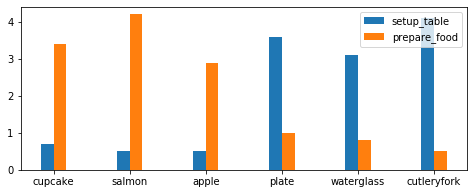

In [15]:
fig, ax2 = plt.subplots(1,1, figsize=(8,3))
x = np.array(range(len(objects_interest)))
for idi in range(len(names)):
    gap = idi + 0.5 - len(names)/2
    gap *= 1./(len(objects_interest))
    gp = 1./(len(objects_interest))
    ax2.bar(x+gap, list(all_count_mean[idi]), width=gp, label=names[idi])
    ax2.set_xticks(x)
    ax2.set_xticklabels(objects_interest)
    plt.legend()

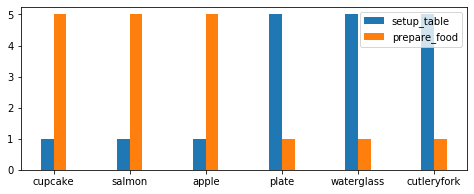

In [16]:
fig, ax2 = plt.subplots(1,1, figsize=(8,3))
x = np.array(range(len(objects_interest)))
for idi in range(len(names)):
    gap = idi + 0.5 - len(names)/2
    gap *= 1./(len(objects_interest))
    gp = 1./(len(objects_interest))
    ax2.bar(x+gap, list(all_count_max[idi]), width=gp, label=names[idi])
    ax2.set_xticks(x)
    ax2.set_xticklabels(objects_interest)
    plt.legend()

Text(0.5, 1.0, 'Length Episode')

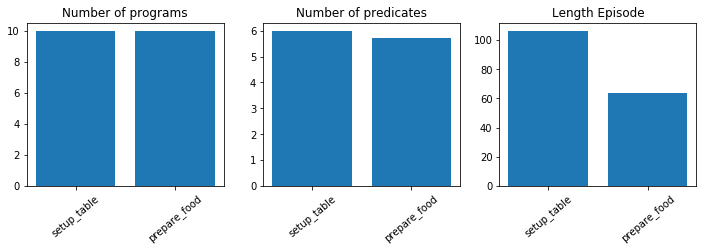

In [17]:

fig, ax2 = plt.subplots(1,3, figsize=(12,3))
x = range(len(names))
ax = ax2[0]
ax.bar(x, count_episodes)
ax.set_xticks(x)
ax.set_xticklabels(names,  rotation=40)
ax.set_title('Number of programs')

ax = ax2[1]
ax.bar(x, count_pred)
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=40)
ax.set_title('Number of predicates')

ax = ax2[2]
ax.bar(x, count_length)
ax.set_xticks(x)
ax.set_xticklabels(names,  rotation=40)
ax.set_title('Length Episode')

In [175]:
count_episodes

[9, 8, 10, 10]

In [176]:
# Agregate relstions
aggregate_relations = {}

all_relation_names = []
for result in results:
    result_rel = result['obj_relations']
    for result_object, counter_result in result_rel.items():
        all_relation_names += list(counter_result.keys())

all_relation_names = list(set(all_relation_names))
relation_name_to_index = {rel_name: ind for ind, rel_name in enumerate(all_relation_names)}

# For every object, a list of counts
all_relations = {}
for task_name in names:
    all_relations[task_name] = {}
    for object_name_interest in objects_interest:
        all_relations[task_name][object_name_interest] = [0 for _ in all_relation_names]
    
for result in results:
    task_name = result['pred_name']
    result_rel = result['obj_relations']
    for result_object, counter_result in result_rel.items():
        for relation_name, relation_count in counter_result.items():
            index = relation_name_to_index[relation_name]
            all_relations[task_name][result_object][index] += relation_count

# Average over episodes
for index_task, task_name in enumerate(names):
    count_ep = count_length[index_task]
    for object_interest in objects_interest:
        all_relations[task_name][object_interest] = np.array(all_relations[task_name][object_interest])/count_ep
            
            
# len(all_relation_names)

# for result in results:
#     for obj_name in objects_interest:
        
# results[0]['obj_relations']

cupcake
[0.         0.54395604 0.1978022  0.         0.         0.
 0.24725275 0.         0.0989011  0.         0.0989011  0.
 0.44505495 0.64285714 0.         0.         0.         0.
 0.         0.         0.         0.         0.0989011  0.34615385
 0.         0.1978022  0.         0.24725275 0.49450549]
salmon
[0.         0.89010989 0.         0.         0.         0.
 0.04945055 0.         0.64285714 0.         0.0989011  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.0989011  0.64285714 0.
 0.         0.         0.         0.         0.        ]
apple
[0.         1.78021978 0.         0.         0.         0.
 0.79120879 0.         0.         0.         0.0989011  0.
 0.3956044  0.74175824 0.         0.         0.         0.59340659
 0.04945055 0.         0.14835165 0.         0.         0.3956044
 0.         0.         0.59340659 0.         0.1978022 ]
plate
[0.         3.11538462 0.24725275 0.         0.0989011  0.1978022
 1.78

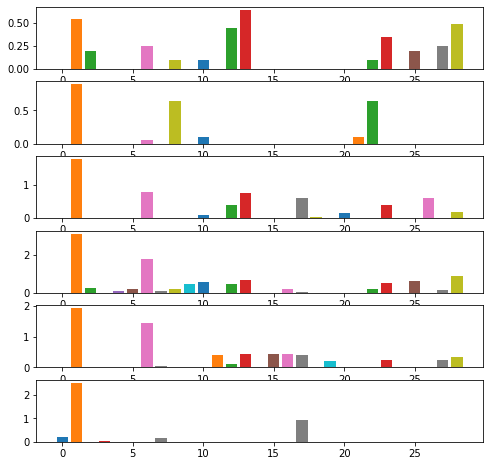

In [177]:
for task_name in [names[0]]:
    fig, ax2 = plt.subplots(len(objects_interest),1, figsize=(8, 8))
    for it_object_interest, name in enumerate(objects_interest):
        print(name)
        array_res = all_relations[task_name][name]
        print(array_res)
        array_res = list(array_res)
        for it, elem in enumerate(array_res):
            relation_name = all_relation_names[it]
            ax2[it_object_interest].bar(it, array_res[it], label=relation_name)
            ax.set_xticks([])


6


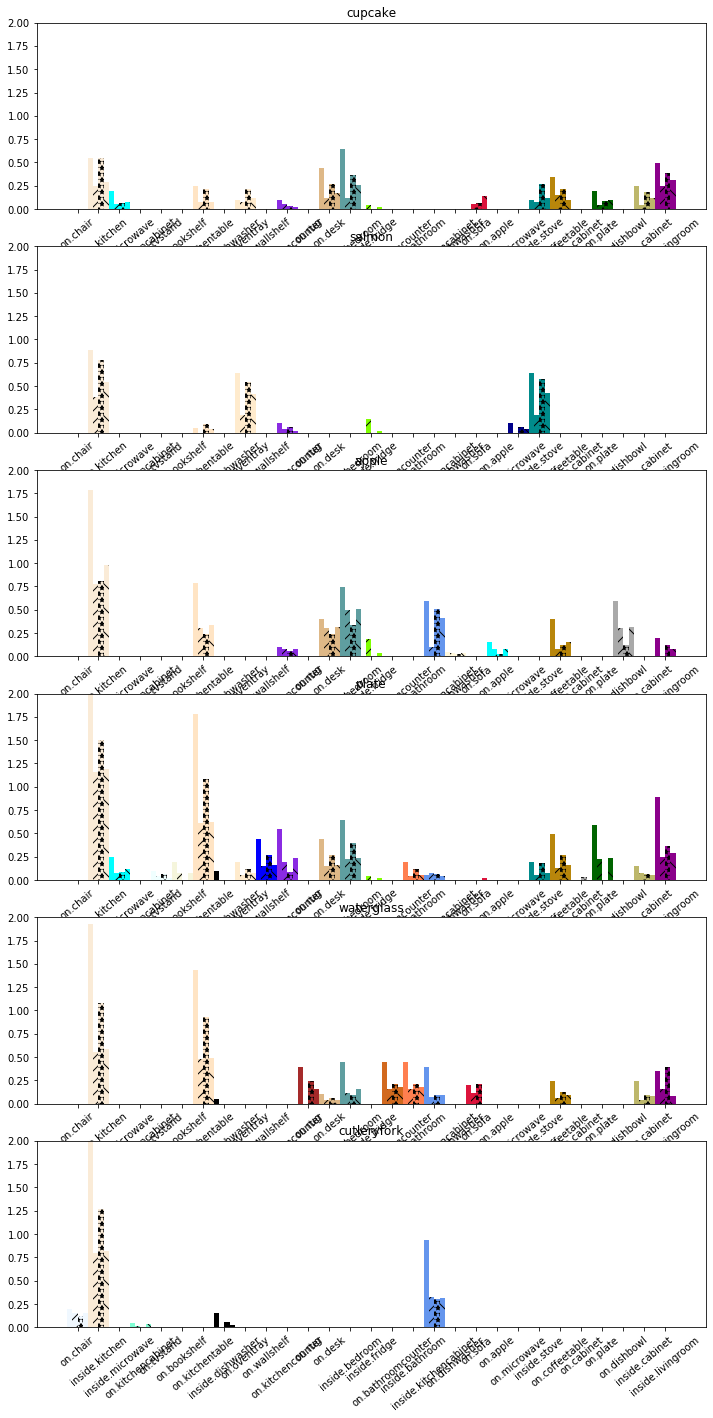

In [178]:
print(len(objects_interest))
fig, ax2 = plt.subplots(len(objects_interest),1, figsize=(12, 4*len(objects_interest)))
for id_task_name, task_name in enumerate(names):
    pattern = ["", "//", '**', '\\'][id_task_name]
    for it_object_interest, name in enumerate(objects_interest):
#         print(name)
        array_res = all_relations[task_name][name]
#         print(array_res)
        array_res = list(array_res)
        colors = list(mcd.CSS4_COLORS.values())
        for it, elem in enumerate(array_res):
            relation_name = all_relation_names[it]
#             ax2[it_object_interest].bar(it*2 + id_task_name, array_res[it], label=relation_name, width=0.5)
            gp = 1./len(names)
            gap = gp * (id_task_name +0.5 - len(names)/2.)
            ax2[it_object_interest].bar(it + gap, array_res[it], width=gp, 
                                        label=relation_name, hatch=pattern,  color=colors[it % len(colors)])
        
        ax2[it_object_interest].set_title(name)
        ax2[it_object_interest].set_ylim([0,2])
        ax2[it_object_interest].set_xticks(range(len(array_res)))
        ax2[it_object_interest].set_xticklabels(all_relation_names, rotation=40)
        ax2[it_object_interest].grid(axis='y')
#     if id_task_name == 0:
#         plt.legend(ncol=3)

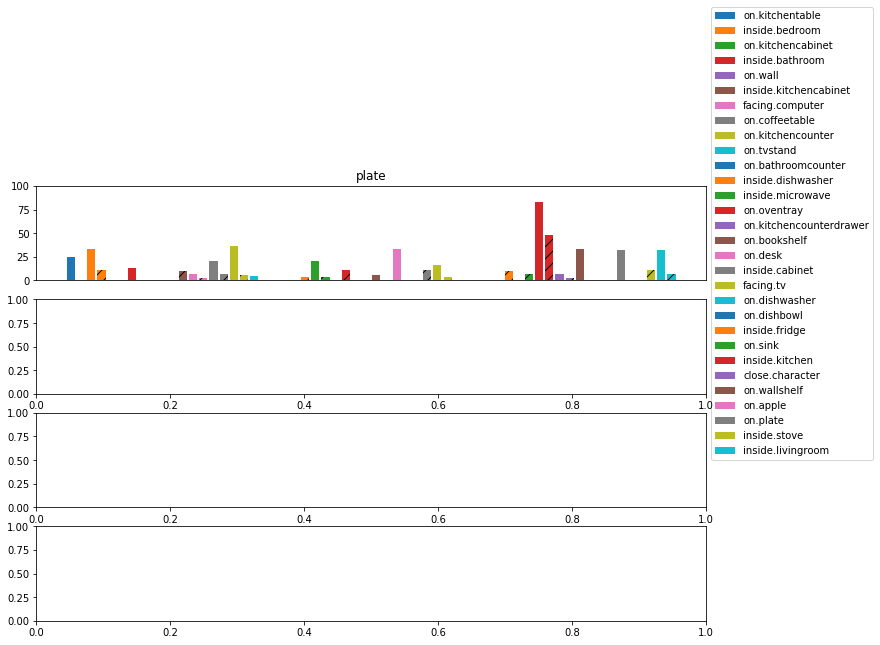

In [195]:

fig, ax2 = plt.subplots(4,1, figsize=(12, 8))
for id_task_name, task_name in enumerate(names):
    pattern = ["", "//"][id_task_name]
    for it_object_interest, name in enumerate(objects_interest[:1]):
#         print(name)
        array_res = all_relations[task_name][name]
#         print(array_res)
        array_res = list(array_res)
        for it, elem in enumerate(array_res):
            relation_name = all_relation_names[it]
#             ax2[it_object_interest].bar(it*2 + id_task_name, array_res[it], label=relation_name, width=0.5)
            ax2[it_object_interest].bar(it*2 + id_task_name, array_res[it], label=relation_name, hatch=pattern)
        
        ax2[it_object_interest].set_title(name)
        ax2[it_object_interest].set_ylim([0,100])
        ax2[it_object_interest].set_xticks([])
        
        ax2[it_object_interest].grid(axis='y')
    if id_task_name == 0 and it_object_interest == 0:
#         ax2[0].legend(ncol=4)
        ax2[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))